# To build a model for training and testing:

In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir_name_train_6to20 = 'Dataset/train/6-20'
dir_name_train_25to30 = 'Dataset/train/25-30'
dir_name_train_42to48 = 'Dataset/train/42-48'
dir_name_train_60to98 = 'Dataset/train/60-98'


In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for 6-20:

 ====== Images in:  Dataset/train/6-20
images_count:	636
min_width:	200
max_width:	200
min_height:	200
max_height:	200



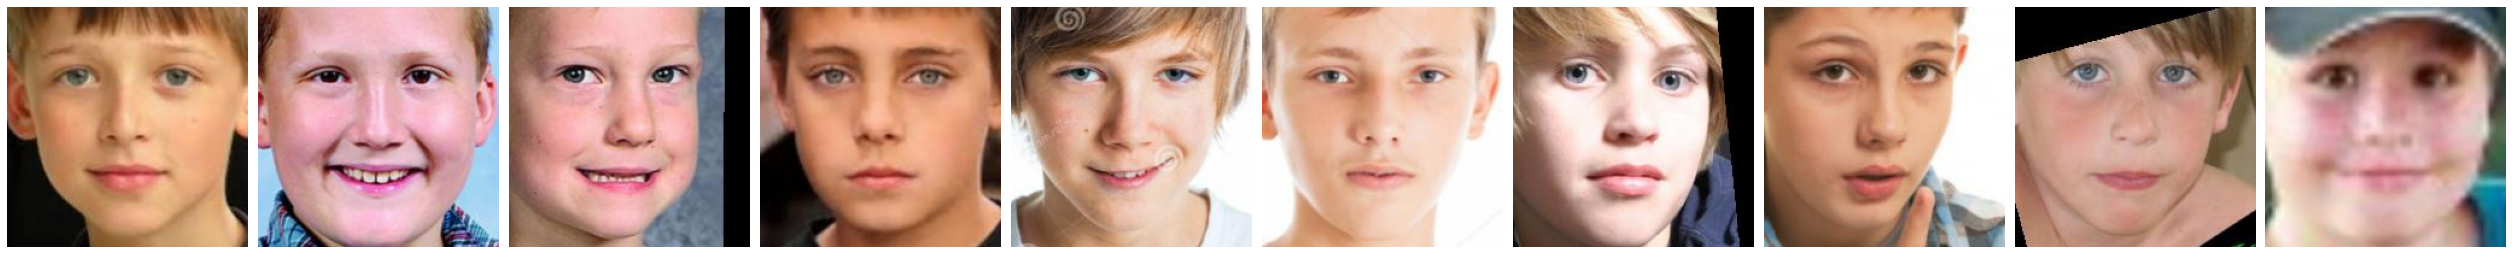

In [7]:
print("")
print("Trainned data for 6-20:")
print("")
Images_details(dir_name_train_6to20)
print("")
plot_images(dir_name_train_6to20, 10)


Trainned data for 25-30:

 ====== Images in:  Dataset/train/25-30
images_count:	605
min_width:	200
max_width:	200
min_height:	200
max_height:	200



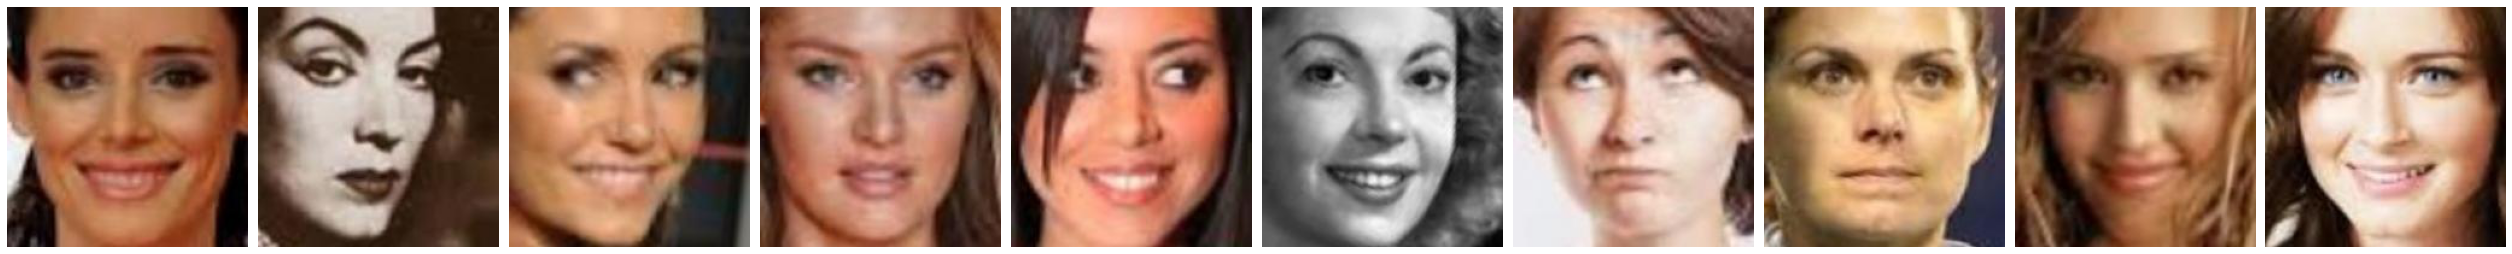

In [8]:
print("")
print("Trainned data for 25-30:")
print("")
Images_details(dir_name_train_25to30)
print("")
plot_images(dir_name_train_25to30, 10)


Trainned data for 42-48:

 ====== Images in:  Dataset/train/42-48
images_count:	531
min_width:	200
max_width:	200
min_height:	200
max_height:	200



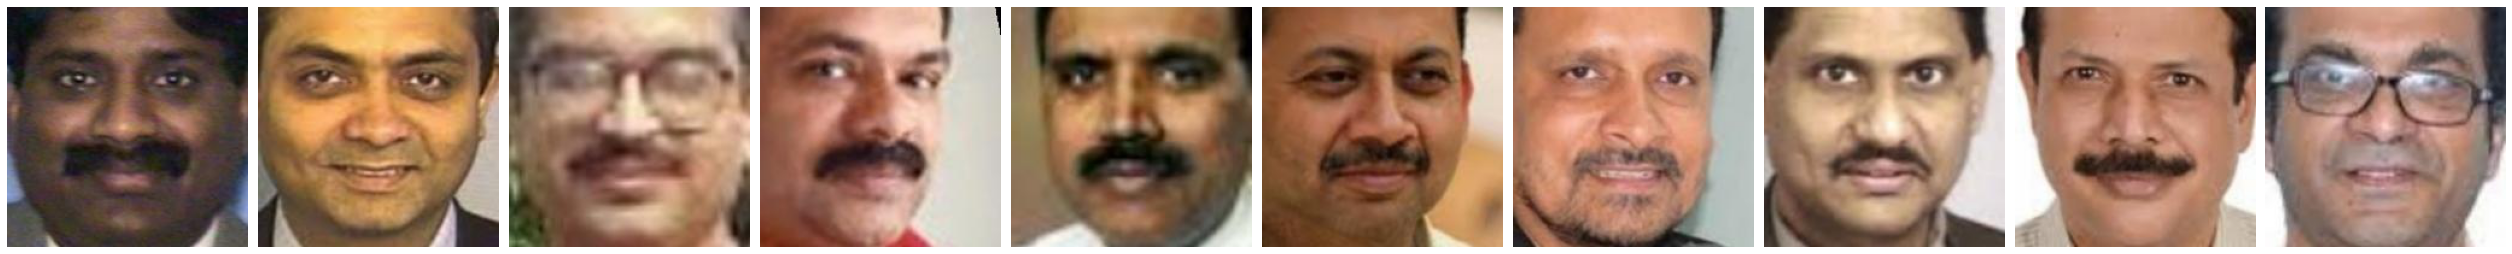

In [9]:
print("")
print("Trainned data for 42-48:")
print("")
Images_details(dir_name_train_42to48)
print("")
plot_images(dir_name_train_42to48, 10)


Trainned data for 60-98:

 ====== Images in:  Dataset/train/60-98
images_count:	528
min_width:	200
max_width:	200
min_height:	200
max_height:	200



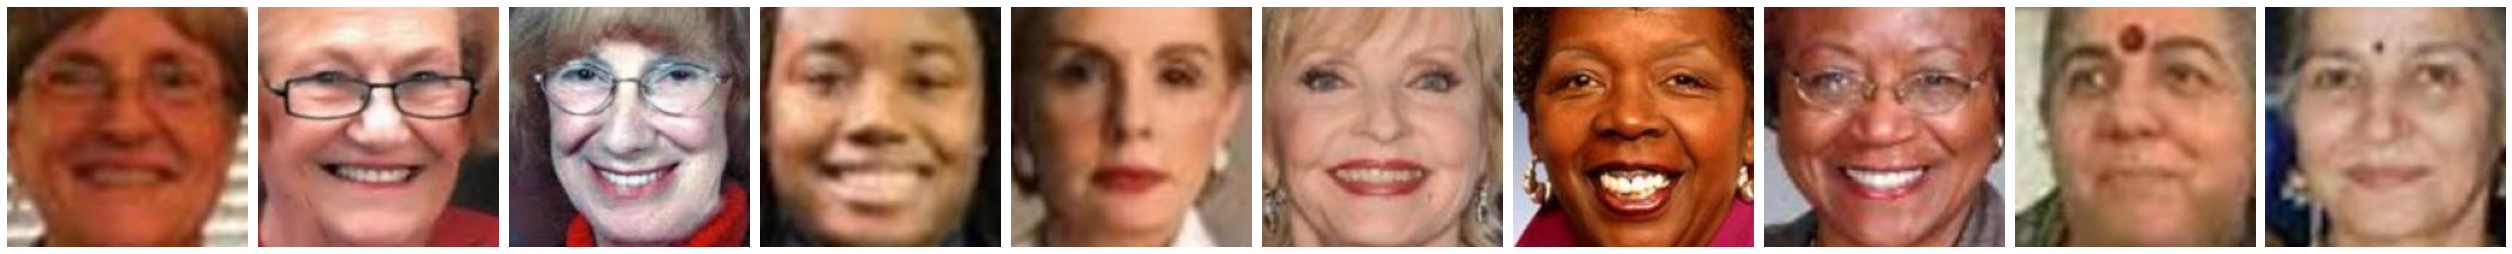

In [10]:
print("")
print("Trainned data for 60-98:")
print("")
Images_details(dir_name_train_60to98)
print("")
plot_images(dir_name_train_60to98, 10)

In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(200,200,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [17]:
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(200,200),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Dataset/test',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 2300 images belonging to 4 classes.
Found 427 images belonging to 4 classes.


In [20]:
img_dims = 150
epochs = 20
batch_size = 32

In [21]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
71/71 [==============================] - 49s 695ms/step - loss: 1.4509 - accuracy: 0.2271 - val_loss: 1.4906 - val_accuracy: 0.2091
Epoch 2/20
71/71 [==============================] - 46s 642ms/step - loss: 1.4244 - accuracy: 0.2293 - val_loss: 1.4575 - val_accuracy: 0.2067
Epoch 3/20
71/71 [==============================] - 50s 709ms/step - loss: 1.4074 - accuracy: 0.2421 - val_loss: 1.4310 - val_accuracy: 0.2284
Epoch 4/20
71/71 [==============================] - 48s 679ms/step - loss: 1.3957 - accuracy: 0.2769 - val_loss: 1.4150 - val_accuracy: 0.2260
Epoch 5/20
71/71 [==============================] - 52s 734ms/step - loss: 1.3903 - accuracy: 0.2747 - val_loss: 1.4022 - val_accuracy: 0.2308
Epoch 6/20
71/71 [==============================] - 51s 718ms/step - loss: 1.3866 - accuracy: 0.2756 - val_loss: 1.3938 - val_accuracy: 0.2260
Epoch 7/20
71/71 [==============================] - 48s 681ms/step - loss: 1.3848 - accuracy: 0.2738 - val_loss: 1.3871 - val_accuracy: 0.2308

In [22]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

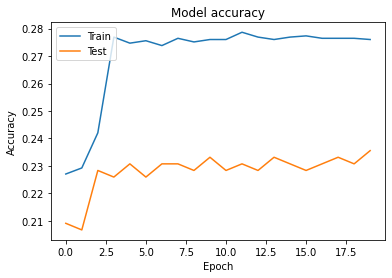

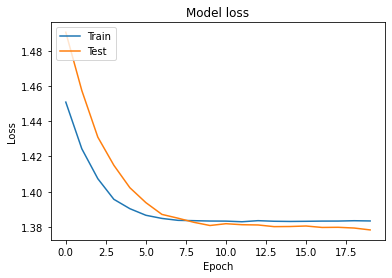

In [23]:
graph()